In [1]:
# Load the necessary packages and modules
import pandas as pd
import numpy as np
import yfinance as yf
import matplotlib.pyplot as plt

In [2]:
# Returns ATR values
def atr(high, low, close, n=14):
    tr = np.amax(np.vstack(((high - low).to_numpy(), (abs(high - close)).to_numpy(), (abs(low - close)).to_numpy())).T, axis=1)
    return pd.Series(tr).rolling(n).mean().to_numpy()

In [4]:
# Retrieve the Apple Inc. data from Yahoo finance
data = yf.download("AAPL", start="2020-01-01", end="2024-12-31")
data.tail()

[*********************100%%**********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2024-07-05,221.649994,226.449997,221.649994,226.339996,226.339996,60412400
2024-07-08,227.089996,227.850006,223.250000,227.820007,227.820007,59085900
2024-07-09,227.929993,229.399994,226.369995,228.679993,228.679993,48076100
2024-07-10,229.300003,233.080002,229.250000,232.979996,232.979996,62627700
2024-07-11,231.389999,232.389999,225.770004,227.570007,227.570007,64516900


In [5]:
data['ATR'] = atr(data['High'], data['Low'], data['Close'], 14)

In [6]:
# Plotting the Price Series chart and the ATR below
fig = plt.figure(figsize=(10, 7))

<Figure size 1000x700 with 0 Axes>

In [7]:
# Define position of 1st subplot
ax = fig.add_subplot(2, 1, 1)

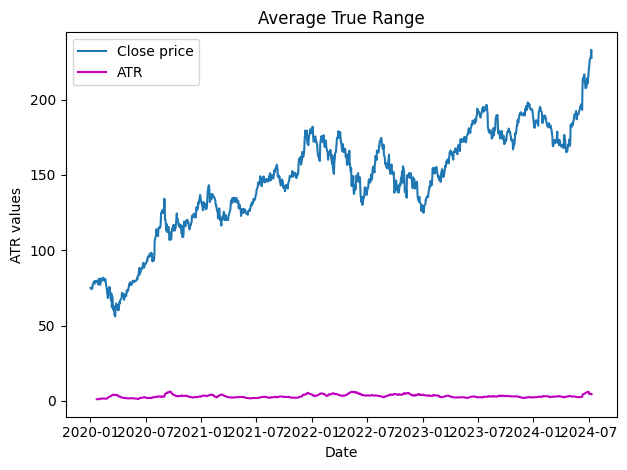

In [8]:
# Set the title and axis labels
plt.title('Apple Price Chart')
plt.xlabel('Date')
plt.ylabel('Close Price')

plt.plot(data['Close'], label='Close price')

# Add a legend to the axis
plt.legend()

# Define position of 2nd subplot
bx = fig.add_subplot(2, 1, 2)

# Set the title and axis labels
plt.title('Average True Range')
plt.xlabel('Date')
plt.ylabel('ATR values')

plt.plot(data['ATR'] , 'm', label='ATR')

# Add a legend to the axis
plt.legend()

plt.tight_layout()
plt.show()